# Project: Investigate a Dataset - [FBI GUN DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This project seeks to investigate the FBI GUN DATA which comes form the FBI's National Instant Criminal Background Check System The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.google.com/url?q=https://www.census.gov/&sa=D&source=editors&ust=1653747504318060&usg=AOvVaw0Zcfuo2zsn8-Jc91qD5cw2/pub?embedded=True). The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.
## List of column names in gun_data Dataset
- Month: Months starting from 2017-09 to 1998-11
- state: List 55 unique states
- permit: Number of gun permits
- permit_recheck: Number of permit recheck
- handgun: a firearm which has a short stock, designed to be held and fired by the use of a single hand
- long_gun: category of firearms with long barrels.
- other: other type of gun
- multiple: person with mutiple gun types
- admin: amdinistration
- prepawn_handgun: Number of handgun types prepawned
- prepawn_long_gun: Number of long gun types prepawned
- prepawn_other: Number of other gun types prepawned
- redemption_handgun: Number of redeemed hand guns redeemed
- redemption_long_gun: Number of redeemed long guns redeemed
- redemption_other: Number of other gun types redeemed
- returned_handgun: number of handgun types returned
- returned_long_gun: number of long gun types returned
- returned_other: number of other gun types returned
- rentals_handgun: number of rentals of handgun
- rentals_long_gun: number of rentals of long gun
- private_sale_handgun: number of private sales of handgun
- private_sale_long_gun: number of private sales of long gun
- private_sale_other: private sales of other gun types
- return_to_seller_handgun: handguns returned to a seller
- return_to_seller_long_gun: Long guns returend to a seller
- return_to_seller_other: other guns that were returned to a seller
- totals: total number of column values( guns, permit and all)

## List of column names in Census_data Dataset
This data set columns is made up of fact note and 50 states

- Fact Note: gives a description or note on a particular row of data
- 50 columns listing 50 states

## Description of  the relationship between tables
The gun data and census data are related by states, census data contains population for a particular period which relates to gun data statistic in the gun data column


## Questions to be explored over the course of this report.
<ul>
<li>Which state has the highest category of each variable (e.g highest permit, handguns, private_long_gun e.t.c ?</li>
<li>What census data is most associated with high gun per capita?</li>
<li>What is the overall trend of gun purchases?</li>
</ul>

In [1]:
#we begin our process by importing the relevant package.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
#Reading both gun_data( in excel format) and census data( in csv format)
gun_data=pd.read_excel('gun_data.xlsx')
census_data=pd.read_csv('US_census_data.csv', sep=',')

## Data cleaning steps
<p>previewed the gun_data dataset using gun_data.head()>/p>
<p>inspected the number of rows and colums using gun_data.shape. gun_data set has 12485 rows and 27 columns</p>
<p>previewed the gun_data dataset using gun_data.info() to check for null values and data types info (month is in string and needs to be converted to data_time format.</p>
<p>gun_data.dtypes shows month column is in string and needs to be converted to data_time</p>

### Let's begin with our gun data dataset first

In [4]:
#inspecting the gun_data dataset by previewing the first 3 samples
gun_data.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [5]:
#inspecting using shape and we have 12485 rows and 27 columns in gun_data set
gun_data.shape

(12485, 27)

In [6]:
#inspecting the data types and non-null data
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
#check for null values
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

#### Based on the wrangling step for gun data: 
<p>month is object type, so we need to convert it to date_time. </p>
<p>Total should also be converted it to int. </p>
<p> Also, we have 12485 rows, so any with a diffferent value has null or empty cells.Based on our data set type, I believe the best is to use fillna(0, inplace=True) to fill empty or null cells with 0. </p>

### Let's move to wrangling our census data set

In [8]:
#inspecting the census_data dataset
census_data.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [9]:
#checking the number of rows and columns (85 rows and 52 columns)
census_data.shape

(85, 52)

In [10]:
#inspecting the data types and number of non-null data
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

For the census data set, the state columns should be of type float instead of string, so we need some conversion.

In [11]:
#looking at the summary statistics for the gun_data dataset
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Total retail sales, 2012 ($1,000)",(c),65.80%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,10.7,0.048,50.40%,2.50%,"625,741",10.10%,"444,135",1.50%,"$53,357",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

## Cleaning steps on both gun data dataset and census data dataset

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


## Gun data cleaning
<p>gun_data.info(),shows month is object type, So we need to convert it to date_time.</p>
<p>totals column should also be float, so we convert it to float using astype(float)</p>
<p>Also, we have 12485 rows, so any with a diffferent value has null or empty cells. Based on our data set type, I believe the best is to use fillna(0, inplace=True) to fill empty or null cells with 0.</p>

In [13]:
#Coversion of month from string to datetime
gun_data['month'] = pd.to_datetime(gun_data['month'])
gun_data.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

In [14]:
#convert totals from int to float
gun_data['totals']=gun_data['totals'].astype(float)

In [15]:
#fill up empty cells with zero and make sure to use inplace=true to effect the changes on the current data frame
gun_data.fillna(0, inplace=True)

In [16]:
#checking if any empty cell exist, should return false if none exist
gun_data.isnull().sum().any()

False

## Census data cleaning
> <p>gun_data.info(),shows month is object type, So we need to convert it to date_time.</p>

In [17]:
#function : to convert censu data to float from 2nd colum to the last columns
def convert_census_to_float():
    for i in census_data.columns[2:]:
        census_data[i]=census_data[i].replace('[A-Za-z]', '0', regex=True)
        census_data[i]=census_data[i].replace('[^\d.]', '', regex=True).astype(float)

In [18]:
#calling our conver_census_to_float function: Based on previous requirment review. so implemented the correction
convert_census_to_float()

convert_census_to_float() is my correction for not having a function in my first submission

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




In [19]:
#looking at the summary statistics for the gun_data dataset
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


The above shows the descriptive statistics for the gun data set. 

## RQ1. Which state has the highest category of each variable (e.g highest permit, handguns, private_long_gun e.t.c ?

In [54]:
#checking states with the highest (maximum) permit,permit_recheck,handgun... return_to_seller_other in our whole dataset
#create a loop to give you the state with hihgest of each column

x=2 #index starting at 2 to skip month and state column in our loop
max_state_list=[] #A list to hold states with maximum value in their column
max_value_perCol=[]# A list to hold values of maximum per coulumn
month_list=[]
column_list=[]#A list to hold our column list i.e starting from permit, permit_recheck, handgun...return_to_seller_other

for x, y in zip(gun_data.columns[2:], range(2,26)):
    #first we get the maximimum value for each column
    themax=gun_data[x].max()
    max_value_perCol.append(gun_data[x].max())#and append it to max_value_perCol list
    
    #second we get the column name associated with the max value
    column_name=gun_data[x]
    
    #we append the column name using the y index
    column_list.append(gun_data.columns[y])
    
    #third we use query to check if column_name i.e state equal to max
    stt=gun_data.query('@column_name == @themax').state
    max_state_list.append(stt)

    
highest_df=pd.DataFrame({'column':column_list, 'state':max_state_list, 'Highest(Max)':max_value_perCol})
highest_df.set_index('state')# to make state our index

   

,column,Highest(Max)
state,,
[North Carolina],permit,522188.0
[Illinois],permit_recheck,116681.0
[Texas],handgun,107224.0
[Texas],long_gun,108058.0
[California],other,77929.0
[California],multiple,38907.0
[Kentucky],admin,28083.0
[New York],prepawn_handgun,164.0
[Texas],prepawn_long_gun,269.0


### Findings
The above shows the states with the highest of each category (e.g highest permit is North carolina, Washington has more private sales of handgun, long gun and even other guns e.t.c)

### RSQ 2. What is the overall trend of gun purchases?

The overall trend is that handguns are more purchased than any other gun , followed by long_guns as can be seen from our findings above

### RQ3. What census data is most associated with high gun per capita

In [21]:
# lets sum up all the Population estimates, July 1, 2016,  (V2016)
#lets divide the total population by guns for month 2016-7
#let gets the total for handguns, long  guns

total_pop_july_2016 = census_data.iloc[0,2:].sum() #total population of all states as at july 2016

total_guns_july_2016=gun_data.query('month == "2016-07"').totals.sum() #total sum of handguns(all states) as at july 2016

gunpercapita=total_guns_july_2016/total_pop_july_2016
gunpercapita=(gunpercapita*10000)
gunpercapita_2016=gunpercapita
print("Gun percapita for july 2016 is %f per 10000 person." % (gunpercapita))

Gun percapita for july 2016 is 67.831131 per 10000 person.


In [22]:
#let gets the total for handguns, long  guns

total_pop_april_2010 = census_data.iloc[1,2:].sum() #total population of all states as at july 2016

total_guns_april_2010 = gun_data.query('month == "2010-04"').totals.sum() #total sum of handguns(all states) as at july 2016

gunpercapita=total_guns_april_2010/total_pop_april_2010
gunpercapita=(gunpercapita*10000)
gunpercapita_2010=gunpercapita
print("Gun percapita for April 2010 is %f per 10000 person." % (gunpercapita))

Gun percapita for April 2010 is 39.809663 per 10000 person.


In [23]:
# let's get the percentage of increase of gun per capita from April 2010 to July, 2016.
percentIncrese=((gunpercapita_2016 - gunpercapita_2010)/gunpercapita_2010) * 100
print("we had %f percent increase in Gun percapita (per 10000 person) from April 2010 to July, 2016." % (percentIncrese))

we had 70.388608 percent increase in Gun percapita (per 10000 person) from April 2010 to July, 2016.


### Findings
The above comparison between gun percapita for census data for April, 2010 and July, 2016 shows 2016 cenus data to have high gun percapita.

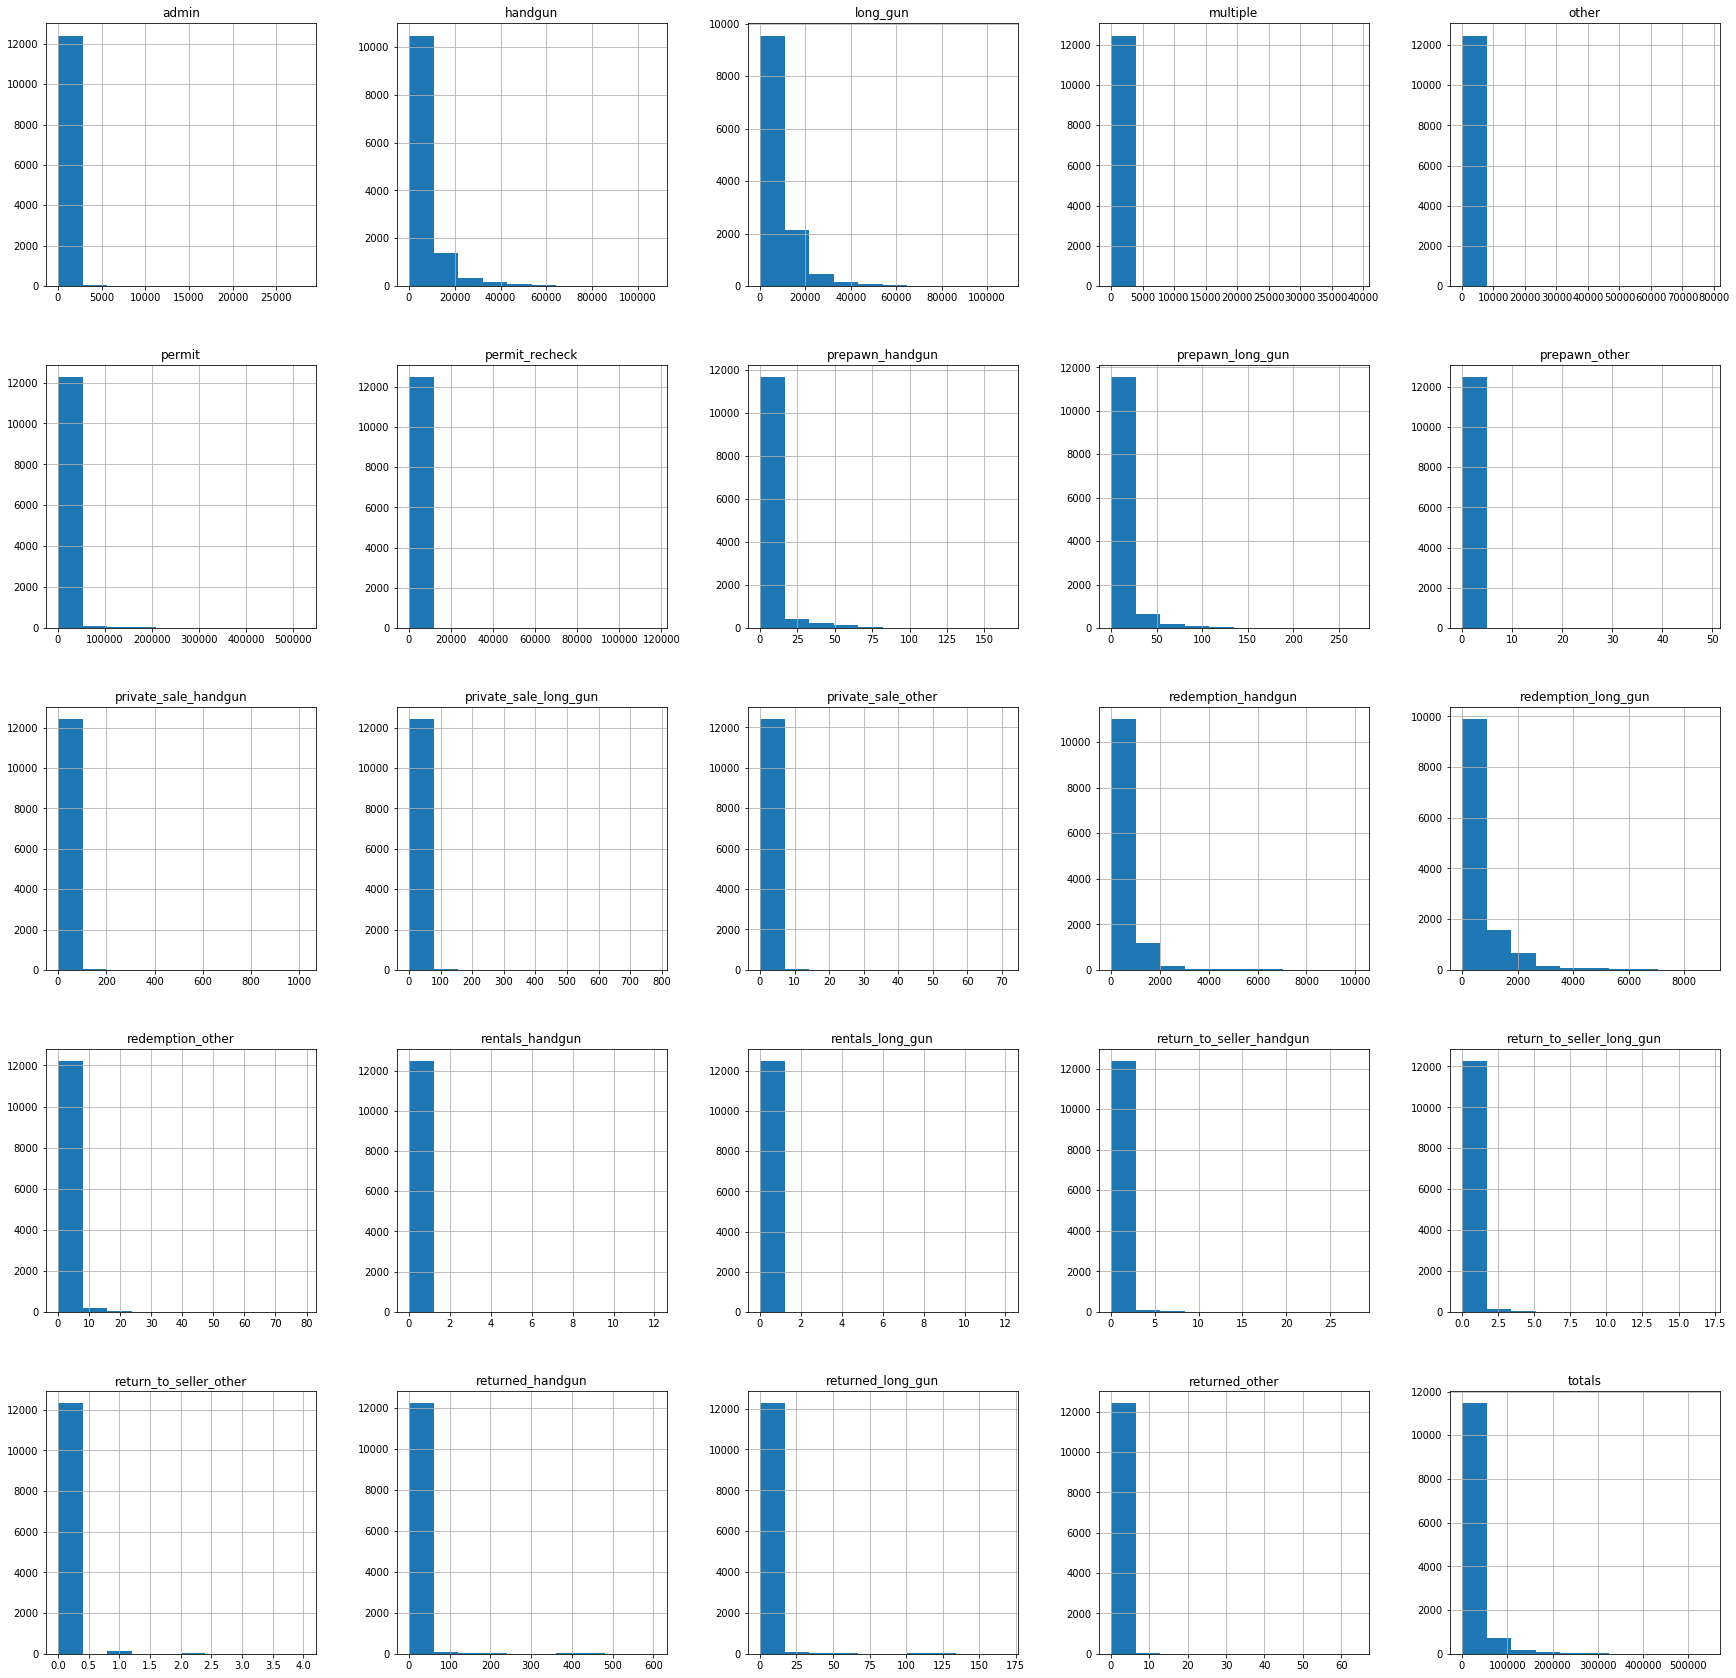

In [24]:
#Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right?
gun_data.hist(figsize=(30,30))
plt.show()

### Observation
The general histogram for the gun_data dataset shows handgun,long gun, pre_pawn_handgun, pre_pawn_long_gun, redemption_handgun, redemption_long_gun, return_hand_gun, return_long_gun, return_to_seller handgun and return_to_seller_longPgun to skew to the right.

### Single-variable (1d) and Multiple-variable (2d) explorations
as suggegsted from the correction, we performed both 1D and 2d exporations

### Single-variable (1d)
we will create a function a function for single variables

In [25]:
#Single-variable (1d) using a function 
def oneDexplore_gun_data(dframe,colName,title,xlab,ylab):
    dframe[colName].hist(figsize=(8,8))
    plt.title(title, fontsize=16)
    plt.ylabel(ylab,fontsize=16)
    plt.xlabel(xlab, fontsize=16)
    plt.show()
    

In [26]:
#function for two column historgram visualization
def two_col_hist(df, title, col1,col2,xlab,ylab, xlab2,ylab2):
    plt.hist(gun_data[col1], 25, facecolor='b', alpha=1, label=xlab2);
    plt.hist(gun_data[col2], 25, facecolor='r', alpha=1, label=ylab2);
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.grid(True)

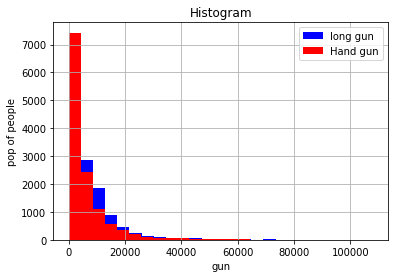

In [27]:
two_col_hist(gun_data,'Histogram','long_gun','handgun','gun','pop of people', 'long gun','Hand gun')

A histogram of long gun and hand gun for visualization

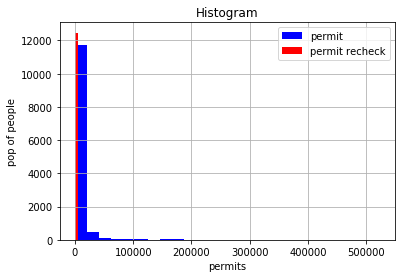

In [53]:
two_col_hist(gun_data,'Histogram','permit','permit_recheck','permits','pop of people', 'permit','permit recheck')

A histogram for permit and permit recheck

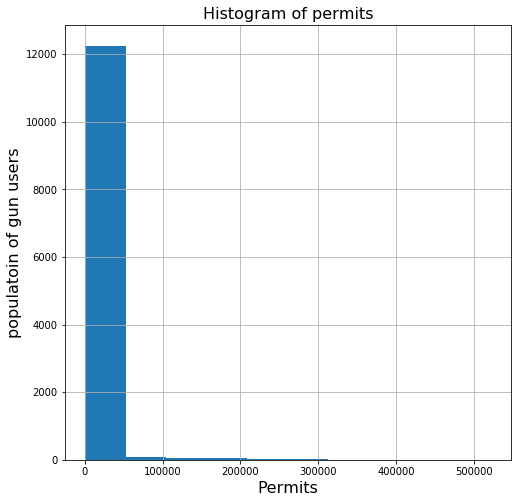

In [56]:
#using our 1d exploration to plot a histogram for permits
oneDexplore_gun_data(gun_data,'permit','Histogram of permits','Permits','populatoin of gun users')

The above shows a historgram of permits and 0 to 50,000 guns had no permits

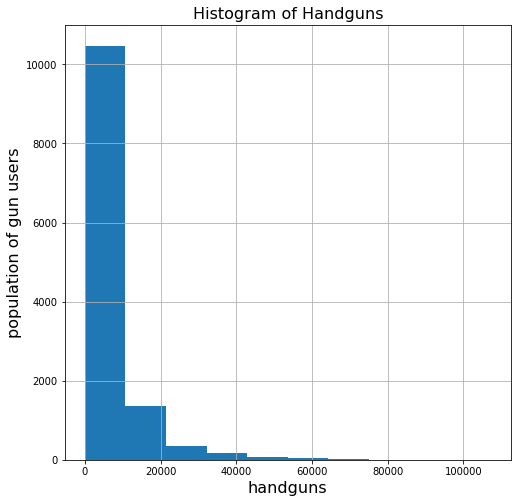

In [57]:
#using our 1d exploration to plot a histogram for handgun
oneDexplore_gun_data(gun_data,'handgun','Histogram of Handguns','handguns','population of gun users')

The above shows a historgram of handguns and between 10,000 to about 21,000 handguns had about 6000 owners/users

In [58]:
#Multiple-variable (2d) explorations
#we created a function(making it 2nd as requried from correction) to plot 2d variables
def twoDexplore_gun_data(dframe,x,y,title,xlab,ylab):
    sns.regplot(data=dframe,x=x,y=y)
    plt.title(title, fontsize=16)
    plt.ylabel(ylab,fontsize=16)
    plt.xlabel(xlab, fontsize=16)

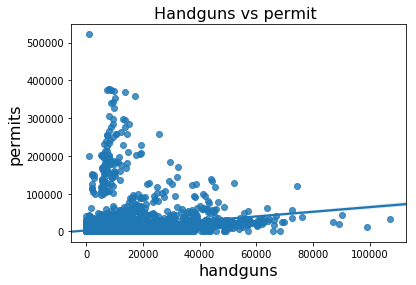

In [59]:
#calling our function to compare relationship between handgun usage and permit
twoDexplore_gun_data(gun_data,'handgun','permit','Handguns vs permit ','handguns','permits')

The above shows some linear relationship between handgun and permits with positive relationship

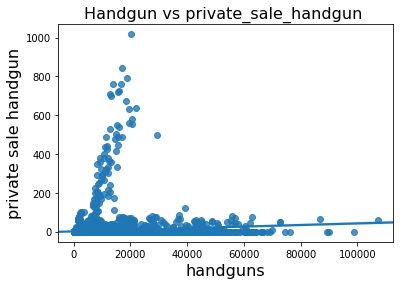

In [60]:
#calling our function to compare relationship between handgun usage and private hand gun sales
twoDexplore_gun_data(gun_data,'handgun','private_sale_handgun','Handgun vs private_sale_handgun ','handguns','private sale handgun')

The above shows as Handguns usage increased, private sale of handgun increased at the begining, but later increased less.

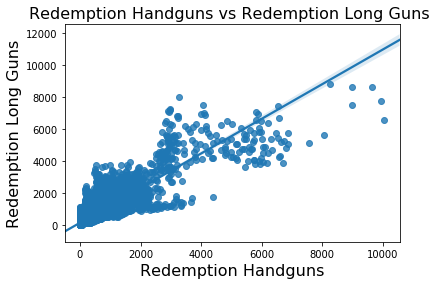

In [61]:
#calling our function to compare relationship between redemption handgun usage and Redemption Long Guns
twoDexplore_gun_data(gun_data,'redemption_handgun','redemption_long_gun','Redemption Handguns vs Redemption Long Guns ','Redemption Handguns','Redemption Long Guns')

The above shows Redemption Handguns and  Redemption Long Guns have a positive correlation

<a id='conclusions'></a>
## Conclusions

### Result:Our data suggest that
- 1. Gun percapita for july 2016 is 67.831131 per 10000 person.
- 2. Gun percapita for April 2010 is 39.809663 per 10000 person.
- 3. There was  70.4% increase in Gun percapita (per 10000 person) from April 2010 to July, 2016.
- 4. North carolina to have the highest permits from 1998-11 to 2017-9
- 5. Washington had more private guns(handgun, long gun and others) in total within that same period
- 6. Texas had the highest for hand gun and long guns. which means they use these guns alot more than other gun types


### Limitation

#### Gun_data dataset
- 1. The gun_data dataset contained missing data 
- 2. The gun_data datset contained null and missing values especially from 1998 to 2013 for the 

#### census_data dataset
- 1. The census_data dataset contains inconsistent data. e.g having the letter D in columns with numeric data.
- 2. The census_data dataset is not organized and require so much time to understand it
- 3. The gun_data datset contained null and missing values especially for 1998 to 2012 for t
- 4. Some parts of the census_data dataset was Suppressed to avoid disclosure of confidential information
- 5. Column wise, the data has inconsistent format, like having percentage(%), decimals and quotes which was tough for conversion


## Important Notes (against plagiarism)
i used stackoverflow where i faced some errors or difficulties. Google search was used to get the formula for per capita but no code was present, just the formula. i consulted geekforgeeks website to understand some more of panda frames.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0